<a href="https://colab.research.google.com/github/Raphael-Blaize/Violence-against-Women-and-Girls-Analysis/blob/main/Violence_against_Women_and_Girls_python_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM DEFINATION**

Gender-based violence (GBV) ,is a global pandemic that affects 1 in 3 women in their lifetime.
The numbers are outstanding :
35% of women worldwide have experienced either physical and/or sexual intimate partner violence or non-partner sexual violence.
Globally, 7% of women have been sexually assaulted by someone other than a partner.
Globally, as many as 38% of murders of women are committed by an intimate partner.
200 million women have experienced female genital mutilation/cutting.
This is a problem that not only affects victims of violence and their families, but also has major social and economic consequences. Discrimination towards women is estimated to cost up to 3.7 percent of a country's GDP in some cases, which is more than twice what most governments spend on education.Failure to resolve this problem now would result in substantial potential costs. 






# **DATASETS USED IN THIS ANALYSIS**

The Datset files used in this analysis are found from kaggle where we have the csv file and the description file that contains the descriptions of our columns 

link : https://www.kaggle.com/andrewmvd/violence-against-women-and-girls









## **DATA SECTION**

### **IMPORTING THE LIBRARIES WE NEED AND LOOKING THROUGH OUR DATASET TO UNDERSTAND IT BETTER**

In [ ]:
#Importing required libraries
import pandas as pd
pd.options.mode.chained_assignment =None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy.stats import stats
from scipy.stats import zscore
from scipy.stats import ttest_ind

In [ ]:
#Reading our dataset
df = pd.read_csv('/content/violence_data.csv')
df


RecordID      Country  ... Survey Year Value
0             1  Afghanistan  ...  01/01/2015   NaN
1             1  Afghanistan  ...  01/01/2015  10.1
2             1  Afghanistan  ...  01/01/2015  13.7
3             1  Afghanistan  ...  01/01/2015  13.8
4             1  Afghanistan  ...  01/01/2015  13.8
...         ...          ...  ...         ...   ...
12595       210     Zimbabwe  ...  01/01/2015  11.8
12596       280     Zimbabwe  ...  01/01/2015  20.1
12597       280     Zimbabwe  ...  01/01/2015  15.0
12598       350     Zimbabwe  ...  01/01/2015   7.2
12599       350     Zimbabwe  ...  01/01/2015   3.7

[12600 rows x 8 columns]

In [ ]:
#Previewing information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


In [ ]:
#Previewing the shape of our dataset
df.shape

(12600, 8)

### **DATA PREPEOCESSING**

#### 1. Data Cleaning

###### a) Validity

In [ ]:
df2 = df.pivot_table(index=['Country','Gender','Demographics Question','Demographics Response', 'Survey Year'],columns=['Question'], values=['Value'])
df2

Value  ...                                        
Question                                                                          ... for at least one specific reason  ... ... if she refuses to have sex with him
Country     Gender Demographics Question Demographics Response        Survey Year                                       ...                                        
Afghanistan F      Age                   15-24                        01/01/2015                                  80.1  ...                                    32.1
                                         25-34                        01/01/2015                                  81.5  ...                                    34.3
                                         35-49                        01/01/2015                                  79.0  ...                                    33.5
                   Education             Higher                       01/01/2015                                  61.1  ...                                    10.8
                                         No education                 01/01/2015                                  81.0  ...                                    34.2
...                                                                                                                ...  ...                                     ...
Zimbabwe    M      Marital status        Married or living together   01/01/2015                                  24.6  ...                                     4.4
                                         Never married                01/01/2015                                  42.4  ...                                     7.8
                                         Widowed, divorced, separated 01/01/2015                                  28.8  ...                                     4.7
                   Residence             Rural                        01/01/2015                                  37.2  ...                                     7.2
                                         Urban                        01/01/2015                                  25.0  ...                                     3.7

[1889 rows x 6 columns]

In [ ]:
# Reset columns
df3 = df2.T.reset_index(drop=True).T.reset_index()
df3
# Rename columns
df3.columns = ['country', 
                     'gender',
                    'demographics_question',
                     'demographics_response', 
                     'survey_year',
                     'violence_any_reason',
                     'violence_argue',
                     'violence_food',
                     'violence_goingout',
                     'violence_neglect',
                    'violence_sex',
                   ]
df3

country gender  ... violence_neglect violence_sex
0     Afghanistan      F  ...             46.5         32.1
1     Afghanistan      F  ...             50.2         34.3
2     Afghanistan      F  ...             48.1         33.5
3     Afghanistan      F  ...             33.4         10.8
4     Afghanistan      F  ...             48.9         34.2
...           ...    ...  ...              ...          ...
1884     Zimbabwe      M  ...             13.8          4.4
1885     Zimbabwe      M  ...             23.2          7.8
1886     Zimbabwe      M  ...             18.3          4.7
1887     Zimbabwe      M  ...             20.1          7.2
1888     Zimbabwe      M  ...             15.0          3.7

[1889 rows x 11 columns]

In [ ]:
df3.head()

country gender  ... violence_neglect violence_sex
0  Afghanistan      F  ...             46.5         32.1
1  Afghanistan      F  ...             50.2         34.3
2  Afghanistan      F  ...             48.1         33.5
3  Afghanistan      F  ...             33.4         10.8
4  Afghanistan      F  ...             48.9         34.2

[5 rows x 11 columns]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                1889 non-null   object 
 1   gender                 1889 non-null   object 
 2   demographics_question  1889 non-null   object 
 3   demographics_response  1889 non-null   object 
 4   survey_year            1889 non-null   object 
 5   violence_any_reason    1889 non-null   float64
 6   violence_argue         1829 non-null   float64
 7   violence_food          1829 non-null   float64
 8   violence_goingout      1889 non-null   float64
 9   violence_neglect       1889 non-null   float64
 10  violence_sex           1862 non-null   float64
dtypes: float64(6), object(5)
memory usage: 162.5+ KB


In [ ]:
#Outliers
# checking for outliers using IQR Scores
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1
outlier = (df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))
outlier.sum()


# The two commented lines of code below can be used to drop the outliers but for now I will not drop them since the whole dataset is important for my analysis

# df_no_outlier = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

# df_no_outlier

country                    0
demographics_question      0
demographics_response      0
gender                     0
survey_year                0
violence_any_reason        0
violence_argue            41
violence_food             98
violence_goingout         49
violence_neglect           3
violence_sex             112
dtype: int64

In [ ]:
#Checking for anomalies

q1_1, q3_1 = np.percentile(df3['violence_any_reason'], [25, 75]) 

iqr1 = q3_1 - q1_1

l_bound = q1_1 - (1.5*iqr1)
u_bound = q3_1 + (1.5 * iqr1)

q1_2, q3_2 = np.percentile(df3['violence_argue'], [25, 75]) 

iqr2 = q3_2 - q1_2

l_bound = q1_2 - (1.5*iqr2)
u_bound = q3_2 + (1.5 * iqr2)
q1_3, q3_3 = np.percentile(df3['violence_food'], [25, 75]) 

iqr3 = q3_3 - q1_3

l_bound = q1_1 - (1.5*iqr3)
u_bound = q3_3 + (1.5 * iqr3)
q1_4, q3_4 = np.percentile(df3['violence_goingout'], [25, 75]) 

iqr4 = q3_4 - q1_4

l_bound = q1_1 - (1.5*iqr3)
u_bound = q3_3 + (1.5 * iqr3)
q1_5, q3_5 = np.percentile(df3['violence_neglect'], [25, 75]) 

iqr5 = q3_5 - q1_5

l_bound = q1_1 - (1.5*iqr3)
u_bound = q3_3 + (1.5 * iqr3)
q1_6, q3_6 = np.percentile(df3['violence_sex'], [25, 75]) 

iqr6 = q3_6 - q1_6

l_bound = q1_1 - (1.5*iqr3)
u_bound = q3_3 + (1.5 * iqr3)
print(iqr1)
print( iqr2)
print(iqr3)
print(iqr4)
print(iqr5)
print(iqr6)

29.9
nan
nan
21.099999999999998
22.5
nan


###### b) Accuracy

In [ ]:
df3["survey_year"].unique()

array(['01/01/2015', '01/01/2017', '01/01/2006', '01/01/2014',
       '01/01/2008', '01/01/2010', '01/01/2016', '01/01/2011',
       '01/01/2012', '01/01/2013', '01/01/2002', '01/01/2018',
       '01/01/2009', '01/01/2005', '01/01/2003', '01/01/2001',
       '01/01/2000', '01/01/2007'], dtype=object)

In [ ]:
df3.loc[(df3["survey_year"] < "01/01/2000") & (df3["survey_year"] > "01/01/2018")]

Empty DataFrame
Columns: [country, gender, demographics_question, demographics_response, survey_year, violence_any_reason, violence_argue, violence_food, violence_goingout, violence_neglect, violence_sex]
Index: []

###### c) Completeness

In [ ]:
#Checking for null values
df3.isnull().sum()

country                   0
gender                    0
demographics_question     0
demographics_response     0
survey_year               0
violence_any_reason       0
violence_argue           60
violence_food            60
violence_goingout         0
violence_neglect          0
violence_sex             27
dtype: int64

In [ ]:
#Filling null values with zeros
df3.fillna(0,inplace =True)

###### d) Consistency

In [ ]:
#Checking for duplicates
df3.duplicated().sum()

0

###### c) Uniformity.

In [ ]:
#changing column names to lower case and placing underscore to make the column names be more presentable
df3.columns = df3.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df3.columns

Index(['country', 'gender', 'demographics_question', 'demographics_response',
       'survey_year', 'violence_any_reason', 'violence_argue', 'violence_food',
       'violence_goingout', 'violence_neglect', 'violence_sex'],
      dtype='object')

In [ ]:
df3['survey_year'] = pd.to_datetime(df3['survey_year'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   country                1889 non-null   object        
 1   gender                 1889 non-null   object        
 2   demographics_question  1889 non-null   object        
 3   demographics_response  1889 non-null   object        
 4   survey_year            1889 non-null   datetime64[ns]
 5   violence_any_reason    1889 non-null   float64       
 6   violence_argue         1889 non-null   float64       
 7   violence_food          1889 non-null   float64       
 8   violence_goingout      1889 non-null   float64       
 9   violence_neglect       1889 non-null   float64       
 10  violence_sex           1889 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 162.5+ KB


In [ ]:
#Describing our dataset
df3.describe()

violence_any_reason  violence_argue  ...  violence_neglect  violence_sex
count          1889.000000     1889.000000  ...       1889.000000   1889.000000
mean             33.217152       18.380678  ...         23.461249     13.020805
std              19.656222       15.737584  ...         15.356779     13.046211
min               0.000000        0.000000  ...          0.000000      0.000000
25%              17.100000        5.700000  ...         10.900000      3.500000
50%              31.000000       14.900000  ...         20.800000      8.800000
75%              47.000000       26.400000  ...         33.400000     18.000000
max              86.900000       76.500000  ...         75.600000     68.700000

[8 rows x 6 columns]

In [ ]:
#Exporting our cleaned dataset
df3_cleaned = df.to_csv("df3")

## EXPLORATORY DATA ANLAYSIS

### **PERFORMING UNIVARIATE ANALYSIS** 

#### a) Categorical and Categorical

> Frequency table

In [ ]:
df3.head(2)

country gender  ... violence_neglect violence_sex
0  Afghanistan      F  ...             46.5         32.1
1  Afghanistan      F  ...             50.2         34.3

[2 rows x 11 columns]

In [ ]:
#Frequency table for gender and demographic question
gender_count = df3.gender.value_counts()
print('The frequency for gender count is:\n',gender_count)
response = df3.demographics_question.value_counts()
print('\n')
print('The frequency for response is:\n',response)


The frequency for gender count is:
 F    1036
M     853
Name: gender, dtype: int64


The frequency for response is:
 Education         497
Age               384
Employment        377
Marital status    375
Residence         256
Name: demographics_question, dtype: int64


In [ ]:
df.head(2)

RecordID      Country Gender  ...                   Question Survey Year Value
0         1  Afghanistan      F  ...  ... if she burns the food  01/01/2015   NaN
1         1  Afghanistan      F  ...  ... if she burns the food  01/01/2015  10.1

[2 rows x 8 columns]

> Bars and Histogram

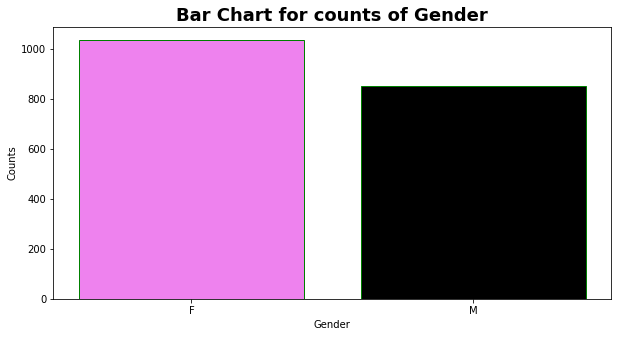

In [ ]:
#Histogram for gender
gender_count= df3.gender.value_counts().reset_index(name='count')
gender_count
x= gender_count['index']
y =gender_count['count']
plt.figure(figsize=(10,5))
plt.bar(x,y , color=('violet','black'),edgecolor='green')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Bar Chart for counts of Gender',fontsize = 18,fontweight ='bold')
plt.show()

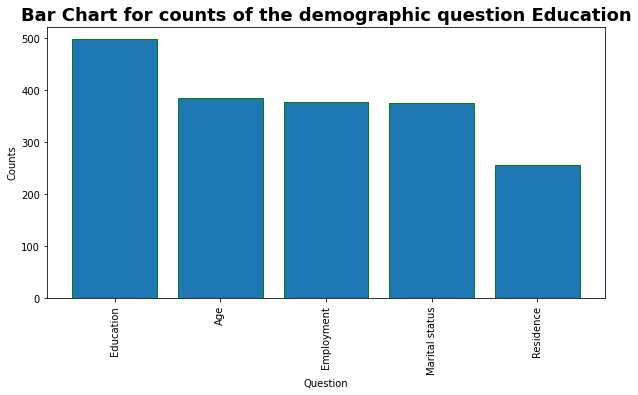

In [ ]:
#Histogram for the demographic question
question = df3.demographics_question.value_counts().reset_index(name='counts')
x= question['index']
y = question['counts']
plt.figure(figsize=(10,5))
plt.bar(x,y ,edgecolor='green')
plt.xlabel('Question')
plt.ylabel('Counts')
degrees = 90
plt.xticks(x, rotation = degrees)
plt.title('Bar Chart for counts of the demographic question Education',fontsize = 18,fontweight ='bold')
plt.show()

####  Numerical variables

######  a) Measures of central tendancy

In [ ]:
df3.head(1)

country gender  ... violence_neglect violence_sex
0  Afghanistan      F  ...             46.5         32.1

[1 rows x 11 columns]

In [ ]:
#Mean
print('Mean')
reason_mean = df3['violence_any_reason'].mean()
print('The mean for violence_any_reason	 is :',reason_mean)

argue_mean = df3['violence_argue'].mean()
print('The mean for violence_argue is :',argue_mean)

food_mean = df3['violence_food'].mean()
print('The mean for violence_food is :',food_mean)

food_mean = df3['violence_food'].mean()
print('The mean for violence_food is :',food_mean)

goingout_mean = df3['violence_goingout'].mean()
print('The mean for violence_goingout is :',goingout_mean)

goingout_mean = df3['violence_goingout'].mean()
print('The mean for violence_goingout is :',goingout_mean)

neglect_mean = df3['violence_neglect'].mean()
print('The mean for violence_neglect is :',neglect_mean)

sex_mean = df3['violence_sex'].mean()
print('The mean for violence_sex is :',sex_mean)
print('\n')

Mean
The mean for violence_any_reason	 is : 33.2171519322393
The mean for violence_argue is : 18.380677607199598
The mean for violence_food is : 8.911116993118048
The mean for violence_food is : 8.911116993118048
The mean for violence_goingout is : 20.04632080465861
The mean for violence_goingout is : 20.04632080465861
The mean for violence_neglect is : 23.461249338274218
The mean for violence_sex is : 13.020804658549494




In [ ]:
#Median
print('Median')
reason_median = df3['violence_any_reason'].median()
print('The median for violence_any_reason	is:', reason_median)

argue_median = df3['violence_argue'].median()
print('The median for violence_argue is :',argue_median)

food_median = df3['violence_food'].median()
print('The medium for violence_food is :',food_median)

food_median = df3['violence_food'].median()
print('The medium for violence_food is :',food_median)

goingout_median = df3['violence_goingout'].median()
print('The median for violence_goingout is :',goingout_median)

goingout_median = df3['violence_goingout'].median()
print('The median for violence_goingout is :',goingout_median)

neglect_median = df3['violence_neglect'].median()
print('The median for violence_neglect is :',neglect_median)

sex_median = df3['violence_sex'].median()
print('The median for violence_sex is :',sex_median)

Median
The median for violence_any_reason	is: 31.0
The median for violence_argue is : 14.9
The medium for violence_food is : 6.1
The medium for violence_food is : 6.1
The median for violence_goingout is : 16.4
The median for violence_goingout is : 16.4
The median for violence_neglect is : 20.8
The median for violence_sex is : 8.8


In [ ]:
#Mode
print('Mode')
reason_mode = df3['violence_any_reason'].mode()
print('The mode for violence_any_reason is:', reason_mode)
argue_mode= df3['violence_argue'].mode()
print('The mode for violence_argue is :',argue_mode)
food_mode= df3['violence_food'].mode()
print('The mode for violence_food is :',food_mode)
food_mode = df3['violence_food'].mode()
print('The mode for violence_food is :',food_mode)
goingout_mode = df3['violence_goingout'].mode()
print('The mode for violence_goingout is :',goingout_mode)
goingout_mode = df3['violence_goingout'].mode()
print('The mode for violence_goingout is :',goingout_mode)
neglect_mode = df3['violence_neglect'].mode()
print('The mode for violence_neglect is :',neglect_mode)
sex_mode = df3['violence_sex'].mode()
print('The mode for violence_sex is :',sex_mode)
print('\n')

Mode
The mode for violence_any_reason is: 0    10.5
1    18.5
dtype: float64
The mode for violence_argue is : 0    0.0
dtype: float64
The mode for violence_food is : 0    0.0
dtype: float64
The mode for violence_food is : 0    0.0
dtype: float64
The mode for violence_goingout is : 0    4.6
dtype: float64
The mode for violence_goingout is : 0    4.6
dtype: float64
The mode for violence_neglect is : 0    18.8
dtype: float64
The mode for violence_sex is : 0    0.0
dtype: float64




###### b) Measures of central dispersion

In [ ]:
#var
print('Variance')
reason_var = df3['violence_any_reason'].var()
print('The variance for violence_any_reason	 is :',reason_var)

argue_var = df3['violence_argue'].var()
print('The variance for violence_argue is :',argue_var)

food_var = df3['violence_food'].var()
print('The variance for violence_food is :',food_var)

goingout_var= df3['violence_goingout'].var()
print('The variance for violence_goingout is :',goingout_var)

neglect_var = df3['violence_neglect'].var()
print('The variance for violence_neglect is :',neglect_var)

sex_var = df3['violence_sex'].var()
print('The variance for violence_sex is :',sex_var)

Variance
The variance for violence_any_reason	 is : 386.36704675709507
The variance for violence_argue is : 247.6715385236556
The variance for violence_food is : 83.97000346564855
The variance for violence_goingout is : 255.8065767635561
The variance for violence_neglect is : 235.83064801459864
The variance for violence_sex is : 170.20361884370755


In [ ]:
#std
print("Standard Deviation")

reason_std = df3['violence_any_reason'].std()
print('The standard deviation for violence_any_reason	 is :',reason_std)

argue_std = df3['violence_argue'].std()
print('The standard deviation for violence_argue is :',argue_std)

food_std = df3['violence_food'].std()
print('The standard deviation for violence_food is :',food_std)

goingout_std = df3['violence_goingout'].std()
print('The standard deviation for violence_goingout is :',goingout_std)

neglect_std = df3['violence_neglect'].std()
print('The standard deviation for violence_neglect is :',neglect_std)

sex_std = df3['violence_sex'].std()
print('The standard deviation for violence_sex is :',sex_std)


Standard Deviation
The standard deviation for violence_any_reason	 is : 19.656221578856275
The standard deviation for violence_argue is : 15.737583630394331
The standard deviation for violence_food is : 9.163514798681156
The standard deviation for violence_goingout is : 15.99395438168923
The standard deviation for violence_neglect is : 15.356778568912121
The standard deviation for violence_sex is : 13.04621089986313


In [ ]:
#finding the range for values
print('Range')
values_max= df3['violence_any_reason'].max()
values_min= df3['violence_any_reason'].min()
values_range= values_max - values_min

print ( 'The range for violence_any_reason is :',values_range)
values1_max= df3['violence_argue'].max()
values1_min= df3['violence_argue'].min()
values_range1= values1_max - values1_min

print ( 'The range for violence_argue is :',values_range1)
values2_max= df3['violence_food'].max()
values2_min= df3['violence_food'].min()
values_range2= values2_max - values2_min

print ( 'The range for violence_food is :',values_range2)
values3_max= df3['violence_goingout'].max()
values3_min= df3['violence_goingout'].min()
values_range3= values3_max - values3_min

print ( 'The range for violence_goingout is :',values_range3)
values4_max= df3['violence_neglect'].max()
values4_min= df3['violence_neglect'].min()
values_range4= values4_max - values4_min

print ( 'The range for violence_neglect is :',values_range4)
values5_max= df3['violence_sex'].max()
values5_min= df3['violence_sex'].min()
values_range5= values5_max - values5_min
print ( 'The range for violence_sex is :',values_range5)

Range
The range for violence_any_reason is : 86.9
The range for violence_argue is : 76.5
The range for violence_food is : 56.7
The range for violence_goingout is : 77.0
The range for violence_neglect is : 75.6
The range for violence_sex is : 68.7


In [ ]:
#finding quantile
print("Quantiles")
reason_quantiles= df3['violence_any_reason'].quantile([0.25,0.50,0.75])
print('The quantiles for violence_any_reason is :\n',reason_quantiles)
argue_quantiles= df3['violence_argue'].quantile([0.25,0.50,0.75])
print('The quantiles for violence_argue is :\n',argue_quantiles)
food_quantiles= df3['violence_food'].quantile([0.25,0.50,0.75])
print('The quantiles for violence_food is :\n',food_quantiles)
goingout_quantiles= df3['violence_goingout'].quantile([0.25,0.50,0.75])
print('The quantiles for violence_goingout is :\n',goingout_quantiles)
neglect_quantiles= df3['violence_neglect'].quantile([0.25,0.50,0.75])
print('The quantiles for violence_neglect is :\n',neglect_quantiles)
sex_quantiles = df3['violence_sex'].quantile([0.25,0.50,0.75])
print('The quantiles for violence_sex is :\n',sex_quantiles)

Quantiles
The quantiles for violence_any_reason is :
 0.25    17.1
0.50    31.0
0.75    47.0
Name: violence_any_reason, dtype: float64
The quantiles for violence_argue is :
 0.25     5.7
0.50    14.9
0.75    26.4
Name: violence_argue, dtype: float64
The quantiles for violence_food is :
 0.25     2.3
0.50     6.1
0.75    12.1
Name: violence_food, dtype: float64
The quantiles for violence_goingout is :
 0.25     7.3
0.50    16.4
0.75    28.4
Name: violence_goingout, dtype: float64
The quantiles for violence_neglect is :
 0.25    10.9
0.50    20.8
0.75    33.4
Name: violence_neglect, dtype: float64
The quantiles for violence_sex is :
 0.25     3.5
0.50     8.8
0.75    18.0
Name: violence_sex, dtype: float64


In [ ]:
#Skewness
print('Skewness')
reason_skew = df3['violence_any_reason'].skew()
print('The skewness for violence_any_reason	 is :',reason_skew)
if reason_skew == 0:
  print('The distribution is symmetric')
elif reason_skew > 0:
  print('The distribution is positively skewed')
else:
  print("The distribution is negatively skewed") 
argue_skew = df3['violence_argue'].skew()
print('The skewness for violence_argue is :',argue_skew)
if argue_skew == 0:
  print('The distribution is symmetric')
elif argue_skew > 0:
  print('The distribution is positively skewed')
else:
  print("The distribution is negatively skewed")
food_skew = df3['violence_food'].skew()
print('The skewness for violence_food is :',food_skew)
if food_skew == 0:
  print('The distribution is symmetric')
elif food_skew > 0:
  print('The distribution is positively skewed')
else:
  print("The distribution is negatively skewed")
goingout_skew = df3['violence_goingout'].skew()
print('The skewness for violence_goingout is :',goingout_skew)
if goingout_skew == 0:
  print('The distribution is symmetric')
elif goingout_skew > 0:
  print('The distribution is positively skewed')
else:
  print("The distribution is negatively skewed")
neglect_skew = df3['violence_neglect'].skew()
print('The skewness for violence_neglect is :',neglect_skew)
if neglect_skew == 0:
  print('The distribution is symmetric')
elif neglect_skew > 0:
  print('The distribution is positively skewed')
else:
  print("The distribution is negatively skewed")
sex_skew = df3['violence_sex'].skew()
print('The skewness for violence_sex is :',sex_skew)
if sex_skew == 0:
  print('The distribution is symmetric')
elif sex_skew > 0:
  print('The distribution is positively skewed')
else:
  print("The distribution is negatively skewed")

#finding kurtosis
print('\n')
print('Kurtosis')
reason_kurt = df3['violence_any_reason'].kurt()
print('The kurtosis for violence_any_reason	 is :',reason_kurt)
if  reason_kurt > 0:
  print('It is leptokurtic')
elif reason_kurt < 0:
   print('It is platykurtic')
else:
  print('It is mesokurtic') 

argue_kurt = df3['violence_argue'].kurt()
print('The kurtosis for violence_argue is :',argue_kurt)
if  argue_kurt > 0:
  print('It is leptokurtic')
elif argue_kurt < 0:
   print('It is platykurtic')
else:
  print('It is mesokurtic') 

food_kurt = df3['violence_food'].kurt()
print('The kurtosis for violence_food is :',food_kurt)
if  food_kurt > 0:
  print('It is leptokurtic')
elif food_kurt < 0:
   print('It is platykurtic')
else:
  print('It is mesokurtic') 

goingout_kurt = df3['violence_goingout'].kurt()
print('The kurtosis for violence_goingout is :',goingout_kurt)
if  goingout_kurt > 0:
  print('It is leptokurtic')
elif goingout_kurt < 0:
   print('It is platykurtic')
else:
  print('It is mesokurtic') 

neglect_kurt = df3['violence_neglect'].kurt()
print('The kurtosis for violence_neglect is :',neglect_kurt)
if  neglect_kurt > 0:
  print('It is leptokurtic')
elif neglect_kurt < 0:
   print('It is platykurtic')
else:
  print('It is mesokurtic') 

sex_kurt = df3['violence_sex'].kurt()
print('The kurtosis for violence_sex is :',sex_kurt)
if  sex_kurt > 0:
  print('It is leptokurtic')
elif sex_kurt < 0:
   print('It is platykurtic')
else:
  print('It is mesokurtic') 


Skewness
The skewness for violence_any_reason	 is : 0.43196932103845004
The distribution is positively skewed
The skewness for violence_argue is : 1.0516556177586462
The distribution is positively skewed
The skewness for violence_food is : 1.818477210897617
The distribution is positively skewed
The skewness for violence_goingout is : 1.0263890533726574
The distribution is positively skewed
The skewness for violence_neglect is : 0.6031272721128149
The distribution is positively skewed
The skewness for violence_sex is : 1.5547948511483034
The distribution is positively skewed


Kurtosis
The kurtosis for violence_any_reason	 is : -0.6066438377572356
It is platykurtic
The kurtosis for violence_argue is : 0.5347075804635337
It is leptokurtic
The kurtosis for violence_food is : 3.8947899776774437
It is leptokurtic
The kurtosis for violence_goingout is : 0.4649717133511979
It is leptokurtic
The kurtosis for violence_neglect is : -0.428571036428556
It is platykurtic
The kurtosis for violence_s

In [ ]:
df3

country gender  ... violence_neglect violence_sex
0     Afghanistan      F  ...             46.5         32.1
1     Afghanistan      F  ...             50.2         34.3
2     Afghanistan      F  ...             48.1         33.5
3     Afghanistan      F  ...             33.4         10.8
4     Afghanistan      F  ...             48.9         34.2
...           ...    ...  ...              ...          ...
1884     Zimbabwe      M  ...             13.8          4.4
1885     Zimbabwe      M  ...             23.2          7.8
1886     Zimbabwe      M  ...             18.3          4.7
1887     Zimbabwe      M  ...             20.1          7.2
1888     Zimbabwe      M  ...             15.0          3.7

[1889 rows x 11 columns]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   country                1889 non-null   object        
 1   gender                 1889 non-null   object        
 2   demographics_question  1889 non-null   object        
 3   demographics_response  1889 non-null   object        
 4   survey_year            1889 non-null   datetime64[ns]
 5   violence_any_reason    1889 non-null   float64       
 6   violence_argue         1889 non-null   float64       
 7   violence_food          1889 non-null   float64       
 8   violence_goingout      1889 non-null   float64       
 9   violence_neglect       1889 non-null   float64       
 10  violence_sex           1889 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 162.5+ KB


### **PERFORMING BIVARIATE ANALYSIS** 

In [ ]:
# changing the survey_year column to contain the years in stead of yy--mm--dd format
df3['year'] = df3['survey_year'].dt.year

In [ ]:
df3.year.unique()

array([2015, 2017, 2006, 2014, 2008, 2010, 2016, 2011, 2012, 2013, 2002,
       2018, 2009, 2005, 2003, 2001, 2000, 2007])

In [ ]:
df3.head(2)

country gender  ... violence_sex  year
0  Afghanistan      F  ...         32.1  2015
1  Afghanistan      F  ...         34.3  2015

[2 rows x 12 columns]

#### **SCATTER PLOTS** 

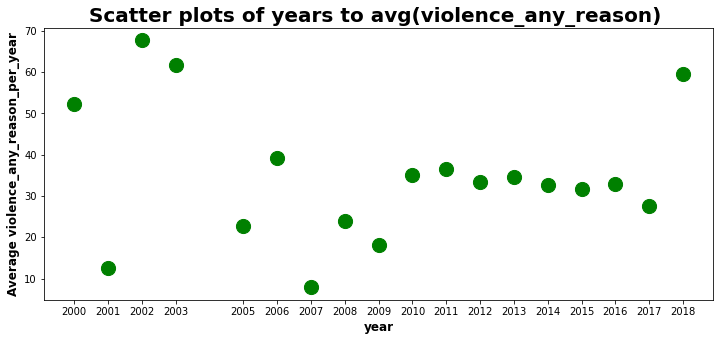

In [ ]:
scatter =df3.groupby('year')['violence_any_reason'].mean().reset_index(name = 'avg_per_year')

plt.figure(figsize=(12,5))
plt.scatter(scatter["year"] , scatter["avg_per_year"],s=200,c='g')
plt.xlabel('year',fontsize=12,fontweight='bold')
plt.ylabel("Average violence_any_reason_per_year",fontsize=12,fontweight='bold')
plt.xticks(scatter["year"])
plt.title('Scatter plots of years to avg(violence_any_reason) ',fontsize= 20,fontweight='bold')
plt.show()

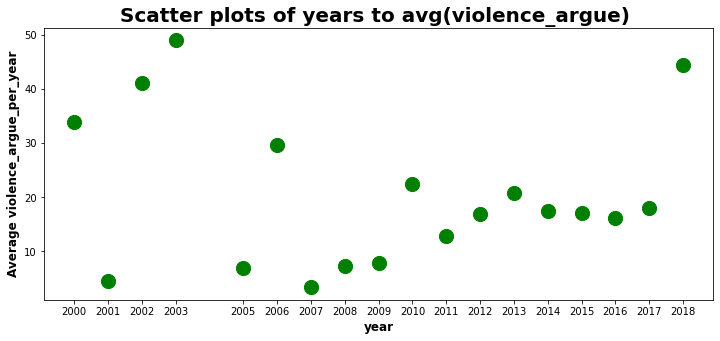

In [ ]:
scatter1 =df3.groupby('year')['violence_argue'].mean().reset_index(name = 'avg_per_year')

plt.figure(figsize=(12,5))
plt.scatter(scatter1["year"] , scatter1["avg_per_year"],s=200,c='g')
plt.xlabel('year',fontsize=12,fontweight='bold')
plt.ylabel("Average violence_argue_per_year",fontsize=12,fontweight='bold')
plt.xticks(scatter1["year"])
plt.title('Scatter plots of years to avg(violence_argue) ',fontsize= 20,fontweight='bold')
plt.show()

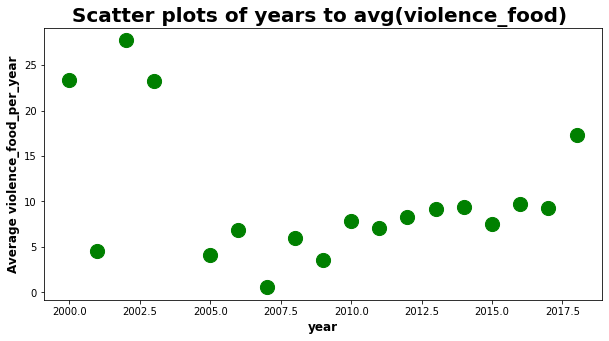

In [ ]:
scatter2 =df3.groupby('year')['violence_food'].mean().reset_index(name = 'avg_per_year')

plt.figure(figsize=(10,5))
plt.scatter(scatter2["year"] , scatter2["avg_per_year"],s=200,c='g')
plt.xlabel('year',fontsize=12,fontweight='bold')
plt.ylabel("Average violence_food_per_year",fontsize=12,fontweight='bold')
plt.title('Scatter plots of years to avg(violence_food) ',fontsize= 20,fontweight='bold')
plt.show()

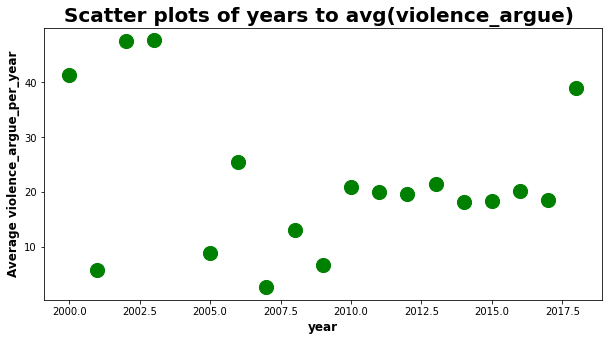

In [ ]:
scatter3 =df3.groupby('year')['violence_goingout'].mean().reset_index(name = 'avg_per_year')

plt.figure(figsize=(10,5))
plt.scatter(scatter3["year"] , scatter3["avg_per_year"],s=200,c='g')
plt.xlabel('year',fontsize=12,fontweight='bold')
plt.ylabel("Average violence_argue_per_year",fontsize=12,fontweight='bold')
plt.title('Scatter plots of years to avg(violence_argue) ',fontsize= 20,fontweight='bold')
plt.show()

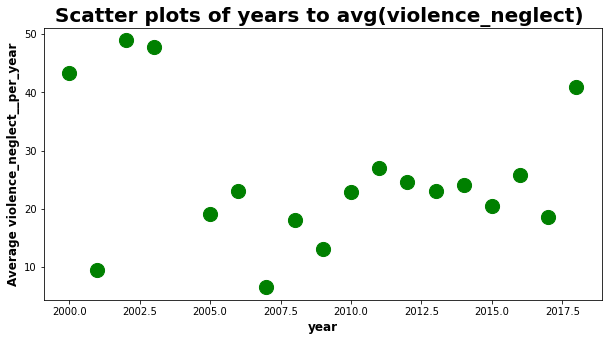

In [ ]:

scatter4 =df3.groupby('year')['violence_neglect'].mean().reset_index(name = 'avg_per_year')

plt.figure(figsize=(10,5))
plt.scatter(scatter4["year"] , scatter4["avg_per_year"],s=200,c='g')
plt.xlabel('year',fontsize=12,fontweight='bold')
plt.ylabel("Average violence_neglect__per_year",fontsize=12,fontweight='bold')
plt.title('Scatter plots of years to avg(violence_neglect) ',fontsize= 20,fontweight='bold')
plt.show()

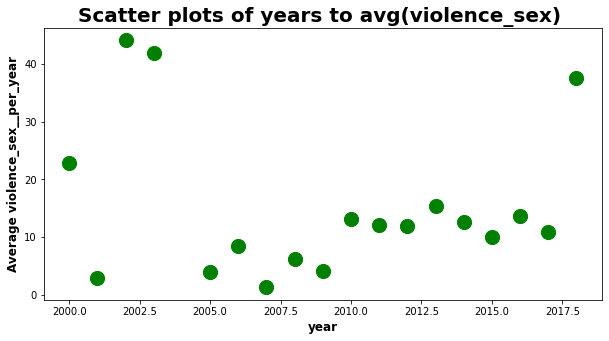

In [ ]:

scatter5 =df3.groupby('year')['violence_sex'].mean().reset_index(name = 'avg_per_year')

plt.figure(figsize=(10,5))
plt.scatter(scatter5["year"] , scatter5["avg_per_year"],s=200,c='g')
plt.xlabel('year',fontsize=12,fontweight='bold')
plt.ylabel("Average violence_sex__per_year",fontsize=12,fontweight='bold')
plt.title('Scatter plots of years to avg(violence_sex) ',fontsize= 20,fontweight='bold')
plt.show()

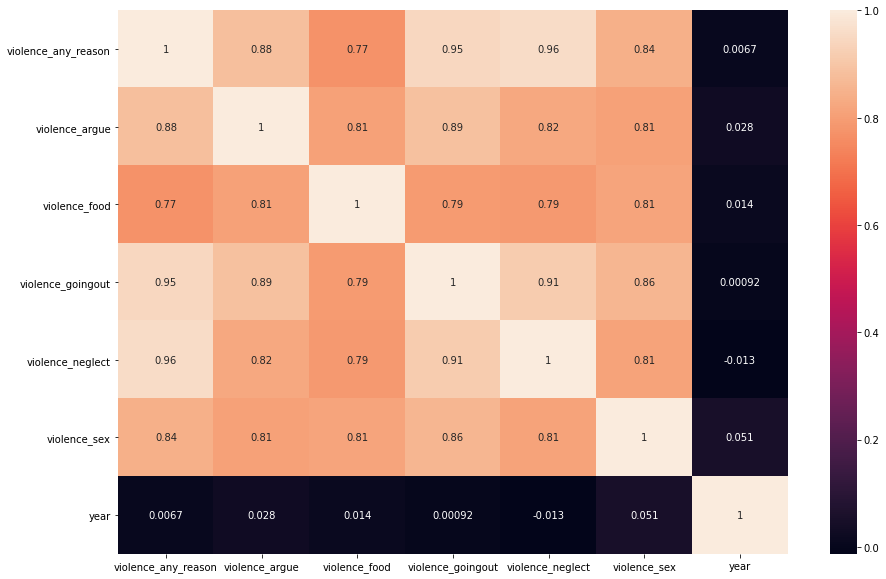

<Figure size 432x288 with 0 Axes>

In [ ]:
#  showing correlation on a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df3.corr(),annot=True)
plt.show()
plt.savefig("correlation.jpg")

#### **STACKED COLUMN CHARTS** 

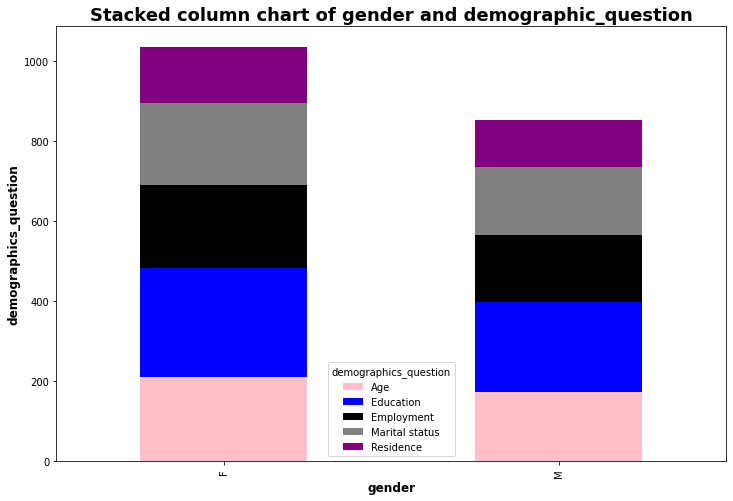

In [ ]:
pd.crosstab(df3['gender'],df3['demographics_question']).plot(kind="bar",stacked=True,figsize=(12,8),color=['pink','blue','black','grey','purple'])
plt.xlabel('gender',fontsize= 12,fontweight= 'bold')
plt.ylabel('demographics_question',fontsize=12,fontweight= 'bold')
plt.title('Stacked column chart of gender and demographic_question',fontsize= 18,fontweight='bold')
plt.show()

#### **LINE PLOTS** 

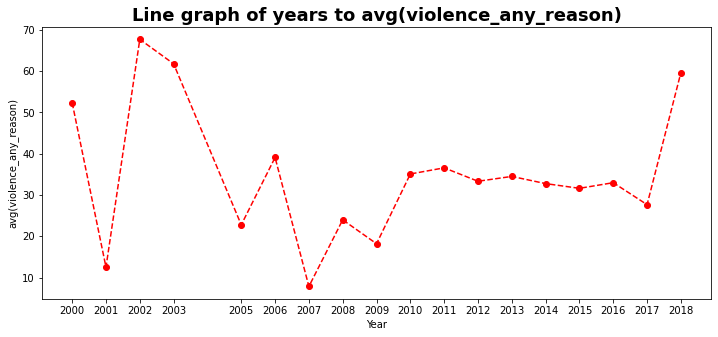

<Figure size 432x288 with 0 Axes>

In [ ]:
scatter =df3.groupby('year')['violence_any_reason'].mean().reset_index(name = 'avg_per_year')

x = scatter['year']
y= scatter['avg_per_year']
plt.figure(figsize=(12,5))
plt.plot(x,y,color = 'red',marker = 'o',linestyle = '--')
plt.xlabel('Year')
plt.xticks(x)
plt.ylabel('avg(violence_any_reason)')
plt.title('Line graph of years to avg(violence_any_reason)',fontsize = 18,fontweight='bold')
plt.show()
plt.savefig("trend for violence_for_no_reason.png")

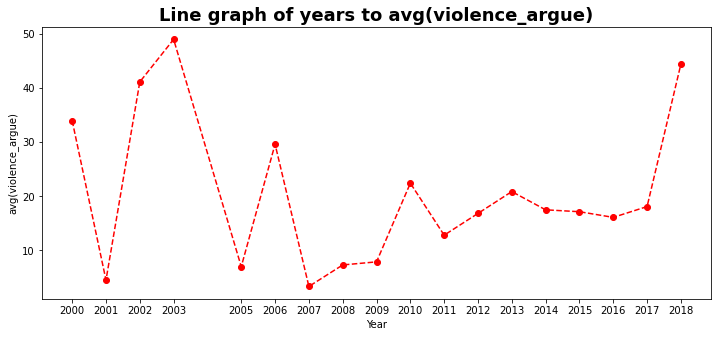

<Figure size 432x288 with 0 Axes>

In [ ]:
x = scatter1['year']
y= scatter1['avg_per_year']
plt.figure(figsize=(12,5))
plt.plot(x,y,color = 'red',marker = 'o',linestyle = '--')
plt.xlabel('Year')
plt.xticks(x)
plt.ylabel('avg(violence_argue)')
plt.title('Line graph of years to avg(violence_argue)',fontsize = 18,fontweight='bold')
plt.show()
plt.savefig("trend for violence_when_arguing.png")

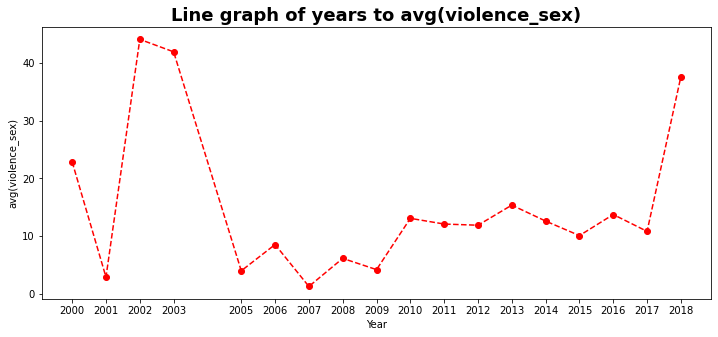

In [ ]:
x = scatter5['year']
y= scatter5['avg_per_year']
plt.figure(figsize=(12,5))
plt.plot(x,y,color = 'red',marker = 'o',linestyle = '--')
plt.xlabel('Year')
plt.xticks(x)
plt.ylabel('avg(violence_sex)')
plt.title('Line graph of years to avg(violence_sex)',fontsize = 18,fontweight='bold')
plt.show()

In [ ]:
# I am going to use an automatic eda to generate a report based on my categrocial and numerical features in the dataset 
# first i am going to check my pandas version
pd.__version__

'1.1.5'

from the above pandas version may run into a join_axes type error, so have to update pandas in-order to use the profilereport library 

In [ ]:
#Upgrading my pandas to the latest version
!pip install pandas==1.2.4

     |████████████████████████████████| 9.9MB 7.7MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


Also i need to make sure that my pandas Profiling is upto date using the below code it will install the latest version of pandas profiling into my environment

In [ ]:
 !pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 6.8MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 3.1MB 12.9MB/s 
     |████████████████████████████████| 1.1MB 39.1MB/s 
     |████████████████████████████████| 296kB 46.9MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=920f5ae75ccd9f0f5d00e1ddd07d7091955eb2063f43bbc9d72689352133792d
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=c62f0ce13c57a3f26476ce9616758ae4a39f266b4562bbd8067c8bd3ac58b3f4
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing in

In [ ]:
#Automatic EDA Analysis
from pandas_profiling import ProfileReport

prof = ProfileReport(df3)
prof.to_notebook_iframe()
#Creating a html file where you can see the profile report much easier
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df5 = df3[['violence_any_reason','violence_argue','violence_food','violence_goingout','violence_neglect','violence_sex']]
df5

violence_any_reason  violence_argue  ...  violence_neglect  violence_sex
0                    80.1            57.5  ...              46.5          32.1
1                    81.5            60.0  ...              50.2          34.3
2                    79.0            59.8  ...              48.1          33.5
3                    61.1            37.7  ...              33.4          10.8
4                    81.0            60.2  ...              48.9          34.2
...                   ...             ...  ...               ...           ...
1884                 24.6            10.2  ...              13.8           4.4
1885                 42.4            18.2  ...              23.2           7.8
1886                 28.8            12.4  ...              18.3           4.7
1887                 37.2            16.8  ...              20.1           7.2
1888                 25.0             8.8  ...              15.0           3.7

[1889 rows x 6 columns]

In [ ]:
taken_zscores=stats.zscore(df5)
print('The z scores of values is:\n',taken_zscores)

The z scores of values is:
 [[ 2.38577197  2.48638431  0.91570806  2.9802697   1.50063056  1.46281917]
 [ 2.4570151   2.64528176  1.01394965  3.03030185  1.74163031  1.63149516]
 [ 2.32979522  2.63256997  1.07944405  2.79264916  1.60484667  1.57015844]
 ...
 [-0.2247798  -0.38012578 -0.61249454 -0.23429558 -0.33617832 -0.63796362]
 [ 0.20267897 -0.10046626 -0.11037083  0.05964327 -0.2189352  -0.44628636]
 [-0.41815401 -0.60893812 -0.72165187 -0.51572639 -0.55112404 -0.71463453]]


In [ ]:
# T_test
ttest_ind(df3['violence_argue'],df3['violence_food'])

Ttest_indResult(statistic=22.600151183506625, pvalue=3.545787508938615e-106)

### **PERFORMING MULTIVARIATE ANALYSIS**

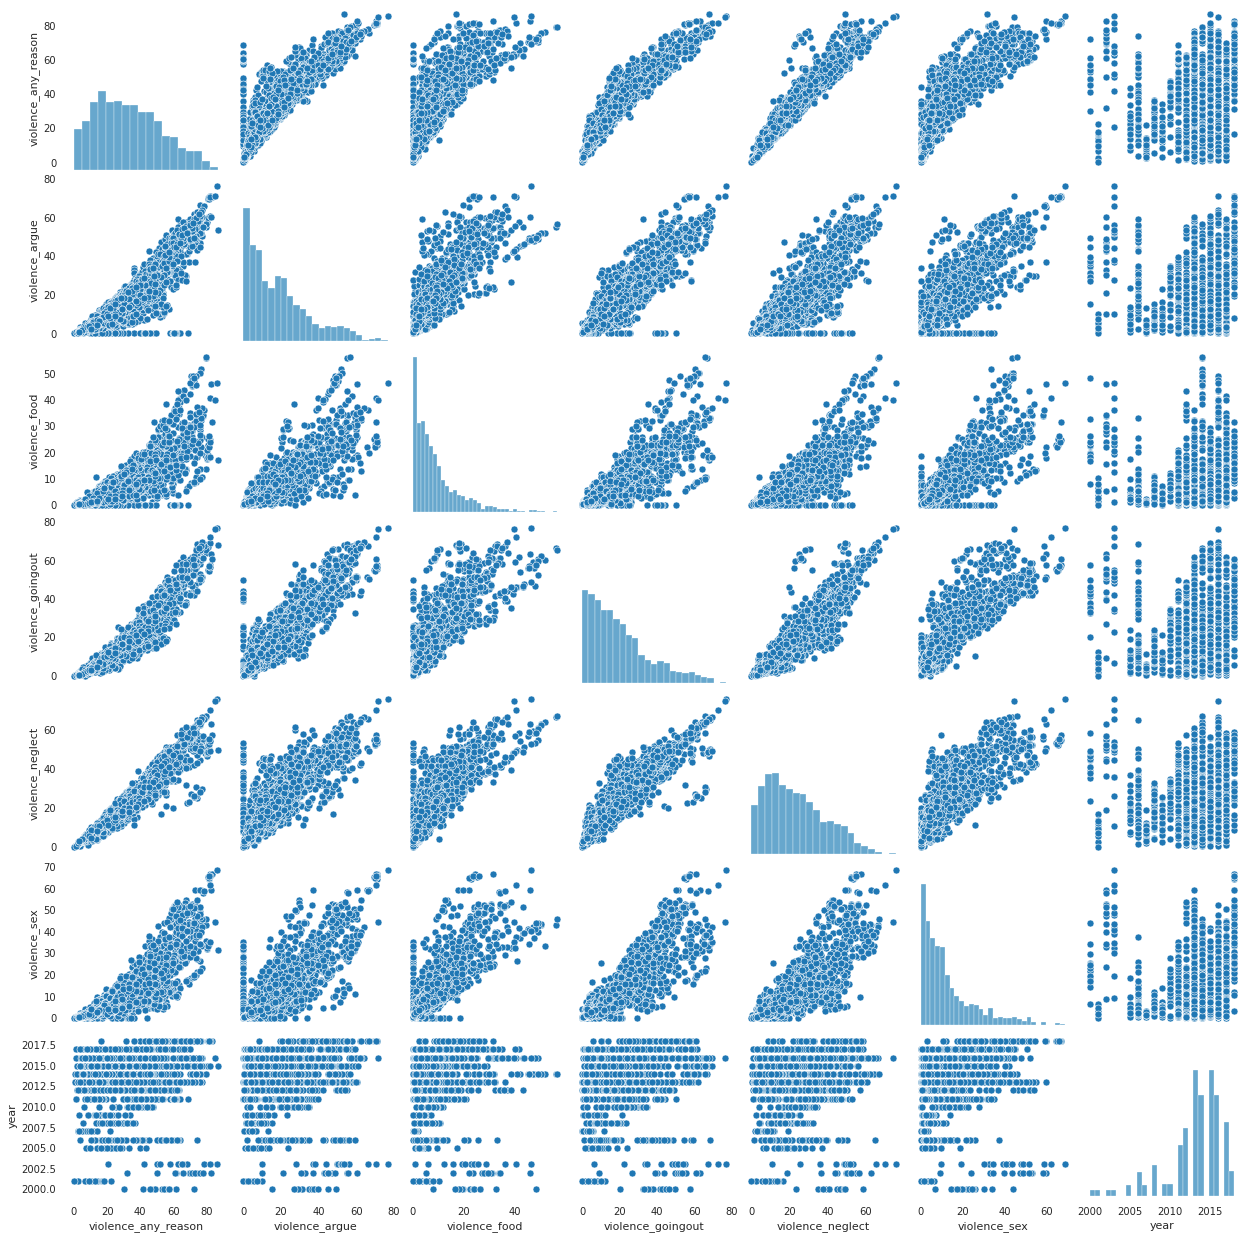

In [ ]:
#Plotting a pair plot
sns.pairplot(df3)
plt.show()

#### PRINCIPAL COMPONENT ANALYSIS

In [ ]:
df3.head(1)

country gender  ... violence_sex  year
0  Afghanistan      F  ...         32.1  2015

[1 rows x 12 columns]

In [ ]:
dummy = pd.get_dummies(df3[["demographics_question", "demographics_response"]])
df8 = pd.concat([df3, dummy], axis = 1).drop(columns = ["demographics_question", "demographics_response"], axis = 1)
df9 = df8.drop(columns = ["country"], axis = 1)
df9

gender  ... demographics_response_Widowed, divorced, separated
0         F  ...                                                  0
1         F  ...                                                  0
2         F  ...                                                  0
3         F  ...                                                  0
4         F  ...                                                  0
...     ...  ...                                                ...
1884      M  ...                                                  0
1885      M  ...                                                  0
1886      M  ...                                                  1
1887      M  ...                                                  0
1888      M  ...                                                  0

[1889 rows x 29 columns]

In [ ]:
# Finding out the all the features with type object
ty = df9.select_dtypes(include = "object").columns
print (ty)

Index(['gender'], dtype='object')


In [ ]:
# now converting typ into numeric type using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Using a for loop to iterate through my ty and encoding them
for feat in ty:
    df9[feat] = le.fit_transform(df9[feat].astype(str))
df9

gender  ... demographics_response_Widowed, divorced, separated
0          0  ...                                                  0
1          0  ...                                                  0
2          0  ...                                                  0
3          0  ...                                                  0
4          0  ...                                                  0
...      ...  ...                                                ...
1884       1  ...                                                  0
1885       1  ...                                                  0
1886       1  ...                                                  1
1887       1  ...                                                  0
1888       1  ...                                                  0

[1889 rows x 29 columns]

In [ ]:
df9.dtypes

gender                                                         int64
survey_year                                           datetime64[ns]
violence_any_reason                                          float64
violence_argue                                               float64
violence_food                                                float64
violence_goingout                                            float64
violence_neglect                                             float64
violence_sex                                                 float64
year                                                           int64
demographics_question_Age                                      uint8
demographics_question_Education                                uint8
demographics_question_Employment                               uint8
demographics_question_Marital status                           uint8
demographics_question_Residence                                uint8
demographics_response_15-24       

##### Step 1: Standardize the Dataset


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df9[['gender', 'violence_any_reason', 'violence_argue',
       'violence_food', 'violence_goingout', 'violence_neglect',
       'violence_sex', 'year', 'demographics_question_Age',
       'demographics_question_Education', 'demographics_question_Employment',
       'demographics_question_Marital status',
       'demographics_question_Residence', 'demographics_response_15-24',
       'demographics_response_25-34', 'demographics_response_35-49',
       'demographics_response_Employed for cash',
       'demographics_response_Employed for kind',
       'demographics_response_Higher',
       'demographics_response_Married or living together',
       'demographics_response_Never married',
       'demographics_response_No education', 'demographics_response_Primary',
       'demographics_response_Rural', 'demographics_response_Secondary',
       'demographics_response_Unemployed', 'demographics_response_Urban',
        'demographics_response_Widowed, divorced, separated']])
scaled_data = scaler.transform(df9[['gender','violence_any_reason', 'violence_argue',
       'violence_food', 'violence_goingout', 'violence_neglect',
       'violence_sex', 'year', 'demographics_question_Age',
       'demographics_question_Education', 'demographics_question_Employment',
       'demographics_question_Marital status',
       'demographics_question_Residence', 'demographics_response_15-24',
       'demographics_response_25-34', 'demographics_response_35-49',
       'demographics_response_Employed for cash',
       'demographics_response_Employed for kind',
       'demographics_response_Higher',
       'demographics_response_Married or living together',
       'demographics_response_Never married',
       'demographics_response_No education', 'demographics_response_Primary',
       'demographics_response_Rural', 'demographics_response_Secondary',
       'demographics_response_Unemployed', 'demographics_response_Urban',
       'demographics_response_Widowed, divorced, separated']])

In [ ]:
scaled_data = pd.DataFrame(scaled_data)
scaled_data

0         1         2   ...        25        26        27
0    -0.907391  2.385772  2.486384  ... -0.269603 -0.269603 -0.268472
1    -0.907391  2.457015  2.645282  ... -0.269603 -0.269603 -0.268472
2    -0.907391  2.329795  2.632570  ... -0.269603 -0.269603 -0.268472
3    -0.907391  1.418901  1.227916  ... -0.269603 -0.269603 -0.268472
4    -0.907391  2.431571  2.657994  ... -0.269603 -0.269603 -0.268472
...        ...       ...       ...  ...       ...       ...       ...
1884  1.102060 -0.438509 -0.519956  ... -0.269603 -0.269603 -0.268472
1885  1.102060  0.467296 -0.011484  ... -0.269603 -0.269603 -0.268472
1886  1.102060 -0.224780 -0.380126  ... -0.269603 -0.269603  3.724784
1887  1.102060  0.202679 -0.100466  ... -0.269603 -0.269603 -0.268472
1888  1.102060 -0.418154 -0.608938  ... -0.269603  3.709153 -0.268472

[1889 rows x 28 columns]

In [ ]:
from sklearn.decomposition import PCA
pca_out = PCA().fit(scaled_data)

In [ ]:
# get the component variance
# Proportion of Variance (from PC1 to PC29)
pca_out.explained_variance_ratio_

array([1.93889963e-01, 8.52848106e-02, 8.30210186e-02, 8.27193199e-02,
       8.01349577e-02, 3.93381218e-02, 3.84981517e-02, 3.83302775e-02,
       3.83099442e-02, 3.83081993e-02, 3.82996185e-02, 3.82708466e-02,
       3.82409683e-02, 3.82151278e-02, 3.81780677e-02, 3.49636497e-02,
       3.02103678e-02, 1.02844402e-02, 6.43863484e-03, 5.88745200e-03,
       2.32787188e-03, 8.48189999e-04, 1.98431439e-32, 6.93613954e-33,
       2.68789004e-33, 2.25067479e-33, 1.99810638e-33, 1.15378589e-33])

In [ ]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = scaled_data.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

PC1       PC2  ...          PC27          PC28
variable                      ...                            
0        -0.130969 -0.026288  ... -0.000000e+00 -1.269849e-16
1         0.411714  0.017769  ...  2.079099e-16 -9.570320e-17
2         0.395261  0.021238  ... -4.600093e-17  3.871406e-16
3         0.380425  0.025492  ... -3.236683e-17 -2.627627e-16
4         0.411577  0.024774  ... -4.561637e-16 -5.528094e-17
5         0.404313  0.014806  ...  7.497630e-17 -1.465218e-16
6         0.393009  0.028259  ...  2.407898e-16  2.500619e-16
7         0.004889  0.020674  ... -5.698711e-17  5.231945e-17
8         0.007276 -0.250733  ... -5.502155e-02  3.905176e-01
9        -0.039816  0.637413  ... -5.898339e-01  4.229635e-01
10        0.036433 -0.149423  ...  5.981641e-02  5.305560e-02
11        0.003178 -0.227685  ...  2.314225e-01  5.207911e-01
12       -0.003582 -0.085362  ... -1.154191e-01  5.614592e-02
13        0.013793 -0.132228  ... -1.289320e-01 -1.696527e-01
14        0.000480 -0.134429  ... -1.289320e-01 -1.696527e-01
15       -0.002623 -0.134820  ... -1.289320e-01 -1.696527e-01
16        0.003895 -0.082076  ... -1.979695e-01  4.027447e-02
17        0.051173 -0.073841  ... -1.987098e-01  4.042508e-02
18       -0.111307  0.269708  ...  1.727554e-01 -1.665863e-01
19        0.004696 -0.122781  ... -3.091126e-01 -2.539121e-01
20       -0.009509 -0.121211  ... -2.999760e-01 -2.464071e-01
21        0.049036  0.288441  ...  1.676050e-01 -1.616198e-01
22        0.024196  0.289092  ...  1.702060e-01 -1.641278e-01
23        0.034379 -0.051338  ... -7.854255e-02  3.300807e-02
24       -0.030005  0.285349  ...  1.733850e-01 -1.671934e-01
25        0.003487 -0.083710  ... -2.009092e-01  4.087251e-02
26       -0.039257 -0.064912  ... -7.854255e-02  3.300807e-02
27        0.009611 -0.121381  ... -3.079902e-01 -2.529901e-01

[28 rows x 28 columns]

positive and negative values in component loadings reflects the positive and negative 
correlation of the variables with the PCs

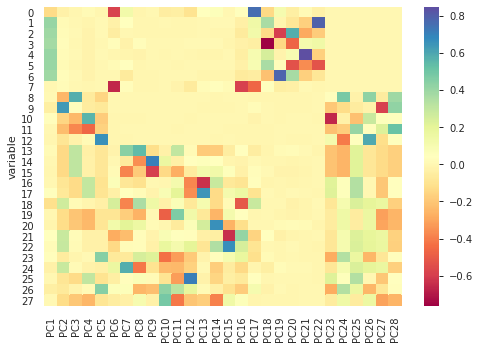

In [ ]:
# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df, cmap='Spectral')
plt.show()

Principal component

As the number of PCs is equal to the number of original variables, We should keep only the PCs which explain the most variance (70-95%) to make the interpretation easier.

 More the PCs you include that explains most variation in the original data, better will be the PCA model. This is highly subjective and based on the user interpretation 

The eigenvalues (variance explained by each PC) for PCs can help to retain the number of PCs. Generally, PCs with eigenvalues > 1 contributes greater variance and should be retained for further analysis.

Scree plot (for elbow test) is another graphical technique useful in PCs retention. We should keep the PCs where there is a sharp change in the slope of the line connecting adjacent PCs.


In [ ]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_

array([5.43179446e+00, 2.38923951e+00, 2.32581977e+00, 2.31736773e+00,
       2.24496726e+00, 1.10205081e+00, 1.07851920e+00, 1.07381623e+00,
       1.07324659e+00, 1.07319771e+00, 1.07295732e+00, 1.07215128e+00,
       1.07131425e+00, 1.07059033e+00, 1.06955210e+00, 9.79500720e-01,
       8.46338334e-01, 2.88116848e-01, 1.80377264e-01, 1.64935970e-01,
       6.52149362e-02, 2.37618991e-02, 5.55902313e-31, 1.94314774e-31,
       7.53007839e-32, 6.30522728e-32, 5.59766117e-32, 3.23231162e-32])

In [ ]:
# get scree plot (for scree or elbow test)
!pip install bioinfokit
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])

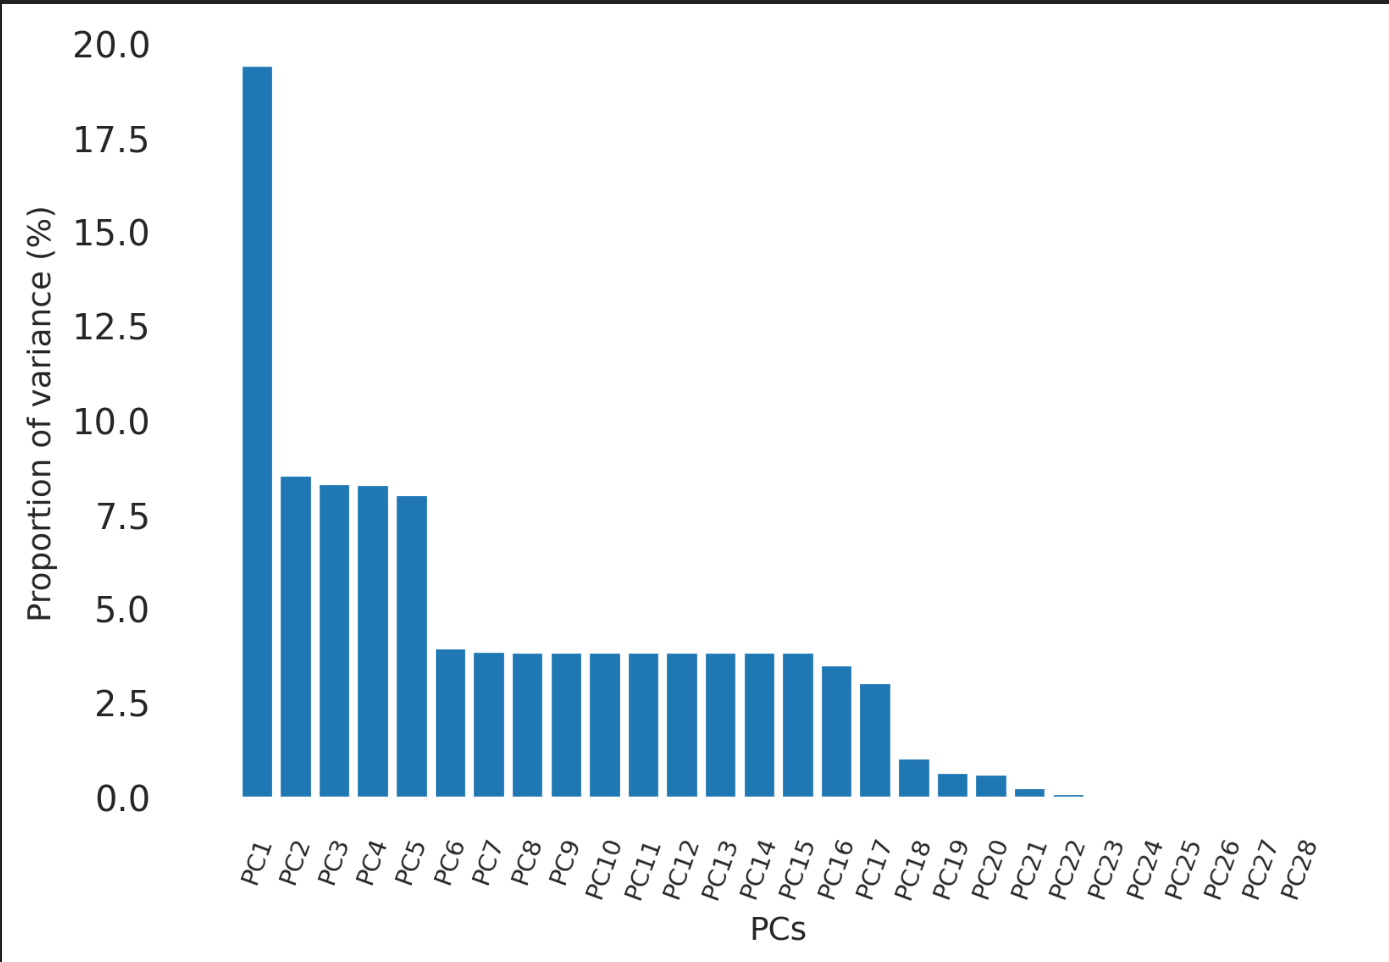

Explained variance (also called explained variation) is used to measure the discrepancy between a model and actual data. ... Higher percentages of explained variance indicates a stronger strength of association. It also means that you make better predictions

the acceptable variance explained in multivariate analysis for a construct to be valid is sixty per cent.


So the first 17 components contribute to ~77% of the total variation in the datasets and have eigenvalues > 1 and thus provide a good approximation of the variation present in the orginal 28D dataset

In [ ]:
plt.figure(figsize=(10,6))
ty=sns.scatterplot(pca_x[:,0], pca_x[:,1])
sns.despine(left=True)
ty.set_title('PCA Results')
ty.set_ylabel('Principle Component1')
ty.set_xlabel('Principle Component2')

#### **DATA ANALYSIS** 

The stastical numbers listed in the analysis were also removed from tableau so the data analysis is based on visualzations from tableau


---


---

https://public.tableau.com/views/VisulisationsRegradingagreementwithkeyquestionsacrossgendereducationlevelandmanyothersocioeconomicvariablesfrom70differentcountries/Overtimeaverageacrosstheworld2000-2018?:language=en&:display_count=y&:origin=viz_share_link

---


---



In  our analysis we found out that:

a) 2018 was the year that recorded with the most agreed key questions that were asked

b) The country which had the highest % average of people who agreed with the key question was Eritrea with an average of 46.19% 

c) The most agreeable question was that the husband is justified in beating his wife for at least one specific reason with the highest % average being in 2018 for females at 70.39% and males at 48.84%

d) We can also see that females have the highest % of responses compared to males across all key question this could be due to some socioeconomic factors affecting the communities across the world

e) In the demographic age we can also see that ages 15-24 has the highest % average of agreement with the key question husband is justified in beating his wife for at least one specific reason coming to 35.88% which is the highest across other age groups 

f) In the demographic Education group we can see that for females those who have received no education agree to the key question that a husband is justified to beating his wife for at least one specific reason with a percentage of 45.45% compares to males in the same education category where there average % was 32.81%

g) In the demographic group of residence we see that those who live in rural areas have a highest % responses of the key question that  husband is justified in beating his wife for at least one specific reason coming to 42.24% for both genders and the ones in urban at 30.94% 


#### **CONCLUSIONS FROM THE ANALYSIS**

a) So first outright observation was that there were more agreed repsonses to the key questions in 2018, this could also be due to the fact that GBV was being brought to light in around 2018 or their were more people being asked about their answers to the key question in 2018 compared to other years

b) The key question that a husband is justified in hitting his wife for any reason has the highest % of agreed responses from both male and female, we can conclude this could be because of the social construct that a man is the head of the house so they do not need to explain themsleves when it comes to abuse or violence in their homes, the way forward is to start teaching equality in homes that a wife is as important in the household as a husband, changing the view of what is commonly known as household heirarchy

c) One of the other key analysis we have seen is that there is a higher percentage of women who agree to the key responses compared to males, this could be due to the fact that we start seeing male reponses from 2005 compared to females where it was in 2000, or the fact that there were more female participants than males 

d) One of the other observations in the analysis is that the demographic age group between 15-24 have some of the highest responses in the key question listed above, this could be tied in with the lack of formal education or because this age is mostly associated with the need to conform to some of the societies standards and the old way of thinking it could be one of the reasons we can see a huge spike in agreeing to some of the key questions, to combat this we should begin camps or enagage more with this age group to educate them more about Gender Violence

e) As mentioned above formal education is important as you also develop an understanding about key issues in communites and in the society in general, in the analysis we see that both males and females who have recievec no formal education agree with key questions the most, to combat this it would be useful to start targetting areas where education is scarce or rather difficult to obtain and begin small camps or rallies that talk about Gender based violence just to be able to educate our fellow people on different issues

f) Another analysis we saw was that people living in rural areas seem to have the  highest response to the key question comared to urban areas, no with modern technology people are able to acess different forums and websites in urban areas in-order to understand more about GBV, comapred to rural areas a way to combat this is maybe to start including cases and ways to combat GBV in newspapers or leaflets in-order to cater for those who do not have access to modern technology in rural areas  











### **HYPOTHESIS SECTION**

#### **DEFINING THE QUESTION**

Null Hypothesis
Average number of Female responses regarding the question of  a husband is justified in hitting or beating his wife for at least one specific reason is not the same as the average male responses in East African countries(Kenya, Uganda and Tanzania).


Alternative Hypothesis
Average number of Female responses regarding the question of a husband is justified in hitting or beating his wife for at least one specific reason is less than  the average male responses in East African countries(Kenya, Uganda and Tanzania).



##### **DATA SECTION**

In [ ]:
Hyp = pd.read_csv("df3_cleaned.csv")
Hyp

##### **DATA PREPEOCESSING**

In [ ]:
# Narrowing it to three eastern african countries
hyp1 = Hyp[(Hyp["country"] == 'Kenya') | (Hyp["country"] == 'Tanzania') | (Hyp["country"] == "Uganda")] 
hyp1

In [ ]:
hyp1.columns

In [ ]:
# Dropping uncesseray columns
hyp2 = hyp1.drop(columns =  ['survey_year','violence_argue','violence_food','violence_goingout',
       'violence_neglect', 'violence_sex','Unnamed: 0'])
hyp2

##### **EXPLORATORY UNIVARIATE ANALYSIS**

In [ ]:
#Automatic EDA Analysis
from pandas_profiling import ProfileReport

prof = ProfileReport(hyp2)
prof.to_notebook_iframe()
#Creating a html file where you can see the profile report much easier
prof.to_file(output_file='output.html')

##### **PERFORMING BIVARIATE ANALYSIS**

In [ ]:
hyp2.columns

In [ ]:
graph = hyp2[hyp2['demographics_question'] == 'Education']

g = sns.catplot(x='demographics_response',y='violence_any_reason',col='country',row='gender',
                data=graph,kind='bar',ci=None)
g.set_axis_labels('Education Level','Percentage (%)')
g.fig.suptitle('Those agreeing a husband is justified in hitting his wife for any reason',y=1.05)

In [ ]:
graph = hyp2[hyp2['demographics_question'] == 'Age']

g = sns.catplot(x='demographics_response',y='violence_any_reason',col='country',row='gender',
                data=graph,kind='bar',ci=None)
g.set_axis_labels('Age group','Percentage (%)')
g.fig.suptitle('Those agreeing a husband is justified in hitting his wife for any reason',y=1.05)

In [ ]:
graph = hyp2[hyp2['demographics_question'] == 'Marital status']

g = sns.catplot(x='demographics_response',y='violence_any_reason',col='country',row='gender',
                order=['Married or living together',
                       'Never married',
                       'Widowed, divorced, separated'],
                data=graph,kind='bar',ci=None)
g.set_axis_labels('Marital Status','Percentage (%)')
g.fig.suptitle('Those agreeing a husband is justified in hitting his wife for any reason',y=1.05)

In [ ]:
graph = hyp2[hyp2['demographics_question'] == 'Employment']

g = sns.catplot(x='demographics_response',y='violence_any_reason',col='country',row='gender',
                data=graph,kind='bar',ci=None)
g.set_axis_labels('Employment group','Percentage (%)')
g.fig.suptitle('Those agreeing a husband is justified in hitting his wife for any reason',y=1.05)
plt.savefig("employment.png")

##### **SOLUTION**

###### **HYPOTHESIS TESTING**

###### DATA PREPROCESSING

In [ ]:
# dropping the demographics_question because we do not need it 
hyp3 = hyp2.drop(columns = ["demographics_question", "country"])
hyp3

In [ ]:
# qq-plot
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot

# q-q plot
qqplot(hyp3["violence_any_reason"], line='s')

In [ ]:
# Shapiro Wilks Test
from scipy.stats import shapiro
stat, p = shapiro(hyp3[["violence_any_reason"]])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print("Sample looks Gaussian")
else:
  print("Sample does not look Gaussian")

From the above qq plot we can see that our data point relatively lie close/are closely fitting to the diagonal line and we have a few deviations at the bottom, the shapiro wilk test is also favourable on small datasets and we can see from the test that the data does have a Gaussian distribution meaning and the p-value is 0.053 meaning we can accept the Null hypothesis

###### Stratified Sampling

In [ ]:
#define total sample size desired
# choosing a sample that is 10% of our population. 
N = 0.1 * (len(hyp3))

# Stratified sample
hyp4 =hyp3.groupby('gender', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(hyp3))))).sample(frac=1).reset_index(drop=True)
hyp4.shape

In [ ]:
# mean of violence_any_reason
tm = Hyp['violence_any_reason'].mean()
print("population mean of violence_any_reason:", tm)

In [ ]:
# mean of violence_any_reason
sm = hyp4['violence_any_reason'].mean()
print("sample mean of violence_any_reason:", sm)

In [ ]:
#standard devaition of the population mean
sd = hyp4['violence_any_reason'].std()
print("standard deviation of violence_any_reason:", sd)

Calculating the Z-score

In [ ]:
# getting the z-score
zs = (sm - tm ) / sd
print(zs)

Calculating the p-value

In [ ]:
#Calculating the p-value
import scipy.stats

#find p-value for z-test
p = scipy.stats.norm.cdf(zs)
print(p)

In [ ]:
#interpretation of the p value
# alpha value is 0.05
if p < 0.05:     
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")